In [7]:
import os
import glob
import pandas as pd
from config import BASE_DIR, OUTPUT_DIR

def display_all_data():
    """すべてのParquetファイルを順番に読み込んで表示する関数"""
    # サブフォルダのリスト
    subfolders = ["raw", "processed", "analysis"]
    
    for subfolder in subfolders:
        folder_path = os.path.join(OUTPUT_DIR, subfolder)
        if os.path.exists(folder_path):
            # サブフォルダ内のすべてのParquetファイルを検索
            parquet_files = glob.glob(os.path.join(folder_path, "*.parquet"))
            
            for file_path in parquet_files:
                filename = os.path.basename(file_path).replace(".parquet", "")
                print(f"\n===== {subfolder}/{filename} =====")
                df = pd.read_parquet(file_path)
                print(df.tail())
        else:
            print(f"フォルダが見つかりません: {folder_path}")

if __name__ == "__main__":
    display_all_data()



===== raw/btcusdt_futures_prices_1d =====
               open     high      low    close      volume  \
open_time                                                    
2025-04-06  83506.1  83790.5  77111.0  78390.0  281191.753   
2025-04-07  78390.1  81200.0  74457.0  79140.0  693843.503   
2025-04-08  79140.1  80832.1  76200.1  76297.9  328409.534   
2025-04-09  76298.0  83554.9  74578.5  82588.0  560649.862   
2025-04-10  82587.9  82706.9  80734.1  80968.3  129838.408   

                        close_time quote_asset_volume  number_of_trades  \
open_time                                                                 
2025-04-06 2025-04-06 23:59:59.999  22582931441.79100           4458658   
2025-04-07 2025-04-07 23:59:59.999  53937100469.04900          10521238   
2025-04-08 2025-04-08 23:59:59.999  25796580911.52060           5357269   
2025-04-09 2025-04-09 23:59:59.999  44072322884.09750           8799174   
2025-04-10 2025-04-10 23:59:59.999  10623253878.34920           2281352 

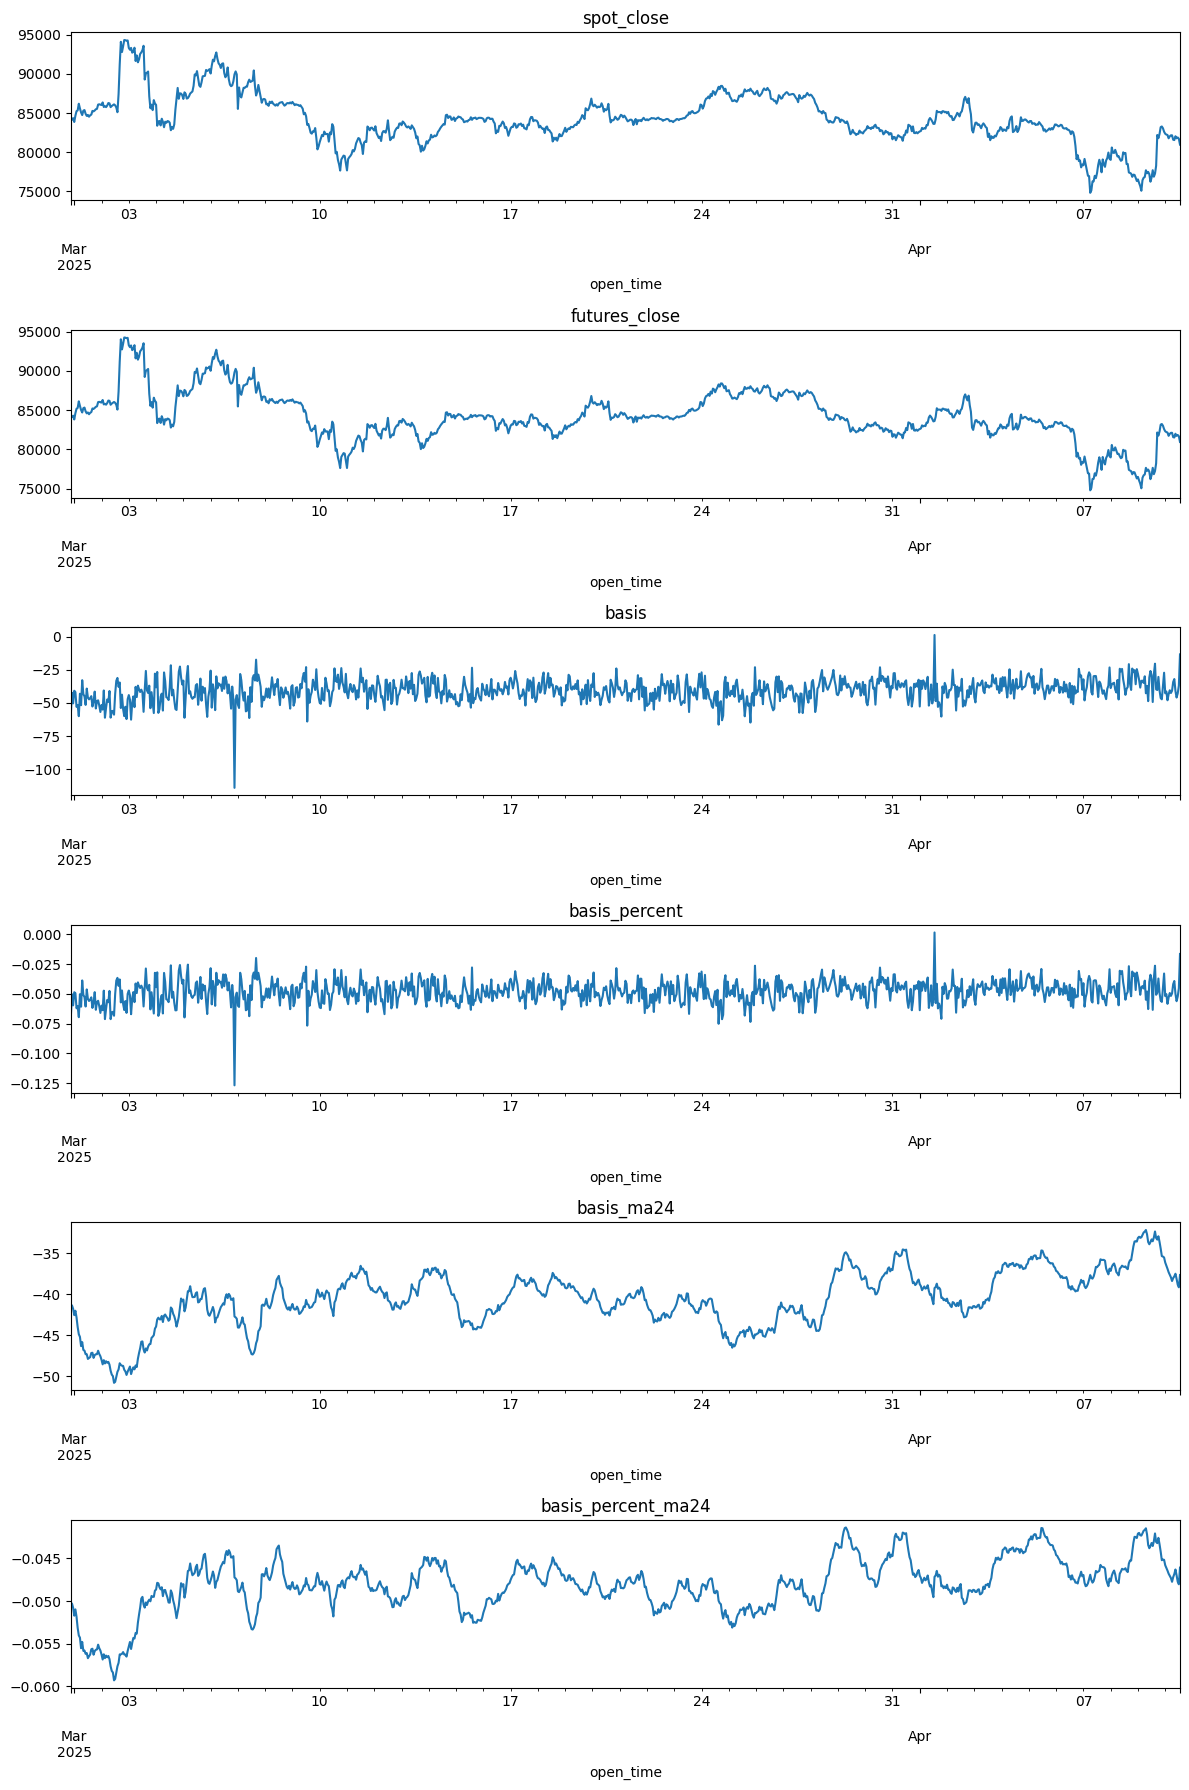

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

file_path = os.path.join(OUTPUT_DIR, "analysis", "basis_with_ma_1hour.parquet")

# DataFrameの読み込み
df = pd.read_parquet(file_path).dropna()#.set_index("open_time")

# サブプロットでデータをプロット
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(12, 3*len(df.columns)))
for i, col in enumerate(df.columns):
    df[col].plot(ax=axes[i], title=col)
    
plt.tight_layout()
plt.show()
